<a href="https://colab.research.google.com/github/Mansi-ag2002/Xethon-2023/blob/main/Customer_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
pd.set_option("display.max_columns", 100)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/NYC311data.csv",on_bad_lines='skip')
nRow, nCol = df.shape
print(f'There are {nRow} row and {nCol} columns')

There are 349300 row and 53 columns


In [ ]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 0:55,12 MANHATTAN,MANHATTAN,1005409,254678.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.86568154,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,NaN,NaN,ADDRESS,ASTORIA,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded to the complai...,01-01-16 1:26,01 QUEENS,QUEENS,1007766,221986.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.77594531,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 4:51,07 BRONX,BRONX,1015081,256380.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.87032452,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01-01-16 7:57,The Police Department responded to the complai...,01-01-16 7:43,10 BRONX,BRONX,1031740,243899.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.83599405,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,NaN,NaN,ADDRESS,ELMHURST,NaN,Precinct,Closed,01-01-16 7:56,The Police Department responded and upon arriv...,01-01-16 3:24,04 QUEENS,QUEENS,1019123,206375.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.73305962,-73.87417,"(40.733059618956815, -73.87416975810375)"


In [ ]:
df.describe()

,Unique Key,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name
count,3.493000e+05,0.0,0.0,0.0,0.0
mean,3.141629e+07,NaN,NaN,NaN,NaN
std,6.063960e+05,NaN,NaN,NaN,NaN
min,3.027948e+07,NaN,NaN,NaN,NaN
25%,3.088734e+07,NaN,NaN,NaN,NaN
50%,3.146088e+07,NaN,NaN,NaN,NaN
75%,3.200037e+07,NaN,NaN,NaN,NaN
max,3.231065e+07,NaN,NaN,NaN,NaN


In [ ]:
print("Shape of the Dataset : {}".format(df.shape))
print("Number of Columns in the Dataset : {}".format(df.shape[1]))
print("Number of Rows in the Dataset : {}".format(df.shape[0]))
print("-"*40)

Shape of the Dataset : (349300, 53)
Number of Columns in the Dataset : 53
Number of Rows in the Dataset : 349300
----------------------------------------


In [ ]:
numeric_features = df.select_dtypes(include = [np.number])
categoric_features = df.select_dtypes(exclude = [np.number])
print("Number of Numerical Features : {}".format(numeric_features.shape[1]))
print("Number of Categorical Features : {}".format(categoric_features.shape[1]))
print("-"*40)

Number of Numerical Features : 5
Number of Categorical Features : 48
----------------------------------------


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349300 entries, 0 to 349299
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      349300 non-null  int64  
 1   Created Date                    349300 non-null  object 
 2   Closed Date                     346862 non-null  object 
 3   Agency                          349300 non-null  object 
 4   Agency Name                     349299 non-null  object 
 5   Complaint Type                  349300 non-null  object 
 6   Descriptor                      342693 non-null  object 
 7   Location Type                   349166 non-null  object 
 8   Incident Zip                    346368 non-null  object 
 9   Incident Address                299264 non-null  object 
 10  Street Name                     299263 non-null  object 
 11  Cross Street 1                  293654 non-null  object 
 12  Cross Street 2  

In [ ]:
df.rename(columns = {'Street Name': 'St_Number'}, inplace = True)

In [ ]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,St,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 0:55,12 MANHATTAN,MANHATTAN,1005409,254678.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.86568154,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,NaN,NaN,ADDRESS,ASTORIA,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded to the complai...,01-01-16 1:26,01 QUEENS,QUEENS,1007766,221986.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.77594531,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 4:51,07 BRONX,BRONX,1015081,256380.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.87032452,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01-01-16 7:57,The Police Department responded to the complai...,01-01-16 7:43,10 BRONX,BRONX,1031740,243899.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.83599405,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,NaN,NaN,ADDRESS,ELMHURST,NaN,Precinct,Closed,01-01-16 7:56,The Police Department responded and upon arriv...,01-01-16 3:24,04 QUEENS,QUEENS,1019123,206375.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.73305962,-73.87417,"(40.733059618956815, -73.87416975810375)"


In [ ]:
df.drop('Agency', inplace=True, axis=1)

In [ ]:
df.head()

,Unique Key,Created Date,Closed Date,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,St,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 0:55,12 MANHATTAN,MANHATTAN,1005409,254678.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.86568154,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,NaN,NaN,ADDRESS,ASTORIA,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded to the complai...,01-01-16 1:26,01 QUEENS,QUEENS,1007766,221986.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.77594531,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 4:51,07 BRONX,BRONX,1015081,256380.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.87032452,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01-01-16 7:57,The Police Department responded to the complai...,01-01-16 7:43,10 BRONX,BRONX,1031740,243899.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.83599405,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,NaN,NaN,ADDRESS,ELMHURST,NaN,Precinct,Closed,01-01-16 7:56,The Police Department responded and upon arriv...,01-01-16 3:24,04 QUEENS,QUEENS,1019123,206375.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.73305962,-73.87417,"(40.733059618956815, -73.87416975810375)"


In [ ]:
df.drop(labels=['Location Type', 'Agency Name','Intersection Street 1','Intersection Street 2','Address Type','Park Facility Name','School Name','School Number','School Region'], inplace=True, axis=1)

In [ ]:
df.drop(labels=['Landmark','Facility Type','School Code','School Phone Number','School City','School State','School Zip','School Not Found','School or Citywide Complaint','Vehicle Type'],inplace=True, axis=1)

In [ ]:
df.head()

,Unique Key,Created Date,Closed Date,Complaint Type,Descriptor,Incident Zip,Incident Address,St,Cross Street 1,Cross Street 2,City,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,School Address,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,Noise - Street/Sidewalk,Loud Music/Party,10034,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,NEW YORK,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 0:55,12 MANHATTAN,MANHATTAN,1005409,254678.0,MANHATTAN,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.86568154,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,Blocked Driveway,No Access,11105,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,ASTORIA,Closed,01-01-16 7:59,The Police Department responded to the complai...,01-01-16 1:26,01 QUEENS,QUEENS,1007766,221986.0,QUEENS,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.77594531,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,Blocked Driveway,No Access,10458,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,BRONX,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 4:51,07 BRONX,BRONX,1015081,256380.0,BRONX,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.87032452,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,Illegal Parking,Commercial Overnight Parking,10461,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,BRONX,Closed,01-01-16 7:57,The Police Department responded to the complai...,01-01-16 7:43,10 BRONX,BRONX,1031740,243899.0,BRONX,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.83599405,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,Illegal Parking,Blocked Sidewalk,11373,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,ELMHURST,Closed,01-01-16 7:56,The Police Department responded and upon arriv...,01-01-16 3:24,04 QUEENS,QUEENS,1019123,206375.0,QUEENS,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.73305962,-73.87417,"(40.733059618956815, -73.87416975810375)"


In [ ]:
df.drop(labels=['School Address','Taxi Company Borough','Taxi Pick Up Location','Bridge Highway Name','Bridge Highway Direction','Road Ramp','Bridge Highway Segment','Garage Lot Name','Ferry Direction','Ferry Terminal Name'], inplace=True, axis=1)

In [ ]:
df.head()

,Unique Key,Created Date,Closed Date,Complaint Type,Descriptor,Incident Zip,Incident Address,St,Cross Street 1,Cross Street 2,City,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,Noise - Street/Sidewalk,Loud Music/Party,10034,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,NEW YORK,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 0:55,12 MANHATTAN,MANHATTAN,1005409,254678.0,MANHATTAN,40.86568154,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,Blocked Driveway,No Access,11105,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,ASTORIA,Closed,01-01-16 7:59,The Police Department responded to the complai...,01-01-16 1:26,01 QUEENS,QUEENS,1007766,221986.0,QUEENS,40.77594531,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,Blocked Driveway,No Access,10458,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,BRONX,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 4:51,07 BRONX,BRONX,1015081,256380.0,BRONX,40.87032452,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,Illegal Parking,Commercial Overnight Parking,10461,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,BRONX,Closed,01-01-16 7:57,The Police Department responded to the complai...,01-01-16 7:43,10 BRONX,BRONX,1031740,243899.0,BRONX,40.83599405,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,Illegal Parking,Blocked Sidewalk,11373,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,ELMHURST,Closed,01-01-16 7:56,The Police Department responded and upon arriv...,01-01-16 3:24,04 QUEENS,QUEENS,1019123,206375.0,QUEENS,40.73305962,-73.87417,"(40.733059618956815, -73.87416975810375)"


In [ ]:
numeric_features = df.select_dtypes(include = [np.number])
categoric_features = df.select_dtypes(exclude = [np.number])
print("Number of Numerical Features : {}".format(numeric_features.shape[1]))
print("Number of Categorical Features : {}".format(categoric_features.shape[1]))
print("-"*40)

Number of Numerical Features : 1
Number of Categorical Features : 22
----------------------------------------


In [ ]:
df['Descriptor'].value_counts()

Loud Music/Party                           68624
No Access                                  68466
Posted Parking Sign Violation              26601
Loud Talking                               24194
Partial Access                             23902
With License Plate                         20639
Blocked Hydrant                            19308
Commercial Overnight Parking               14342
Blocked Sidewalk                           13066
Car/Truck Music                            12251
Double Parked Blocking Traffic              6857
Double Parked Blocking Vehicle              5025
Banging/Pounding                            4969
Engine Idling                               4843
Neglected                                   4380
Car/Truck Horn                              4179
Congestion/Gridlock                         3255
In Prohibited Area                          2281
Other (complaint details)                   2275
Overnight Commercial Storage                2025
Unlicensed          

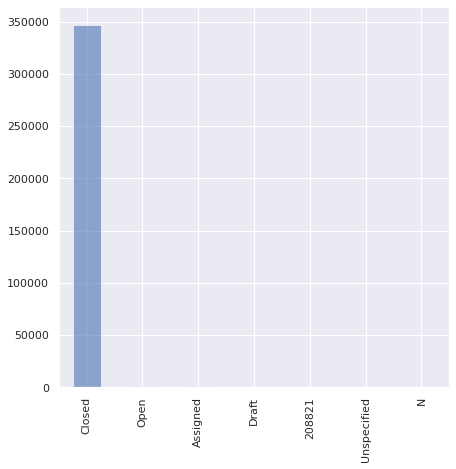

In [ ]:
df['Status'].value_counts().plot(kind='bar',alpha=0.6,figsize=(7,7))
plt.show()



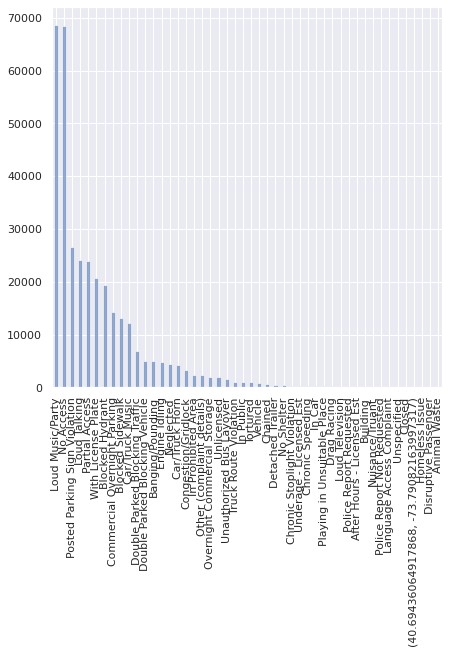

In [ ]:
df['Descriptor'].value_counts().plot(kind='bar',alpha=0.6,figsize=(7,7))
plt.show()

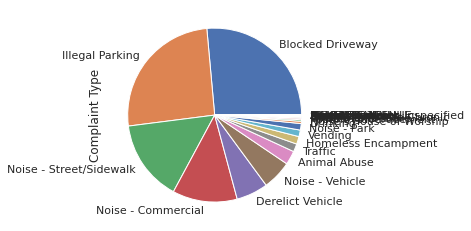

In [ ]:
df['Complaint Type'].value_counts().plot(kind='pie')
plt.show()

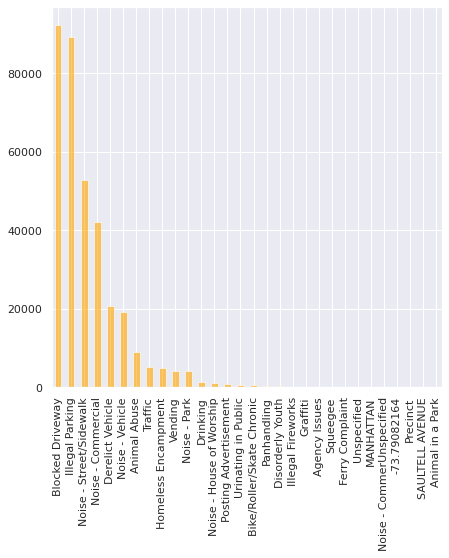

In [ ]:
df['Complaint Type'].value_counts().plot(kind='bar',alpha=0.6,figsize=(7,7),color='orange')
plt.show()

In [ ]:
df['City'].isnull().sum()

2936

In [ ]:
df['City'].fillna('Unknown City', inplace =True)

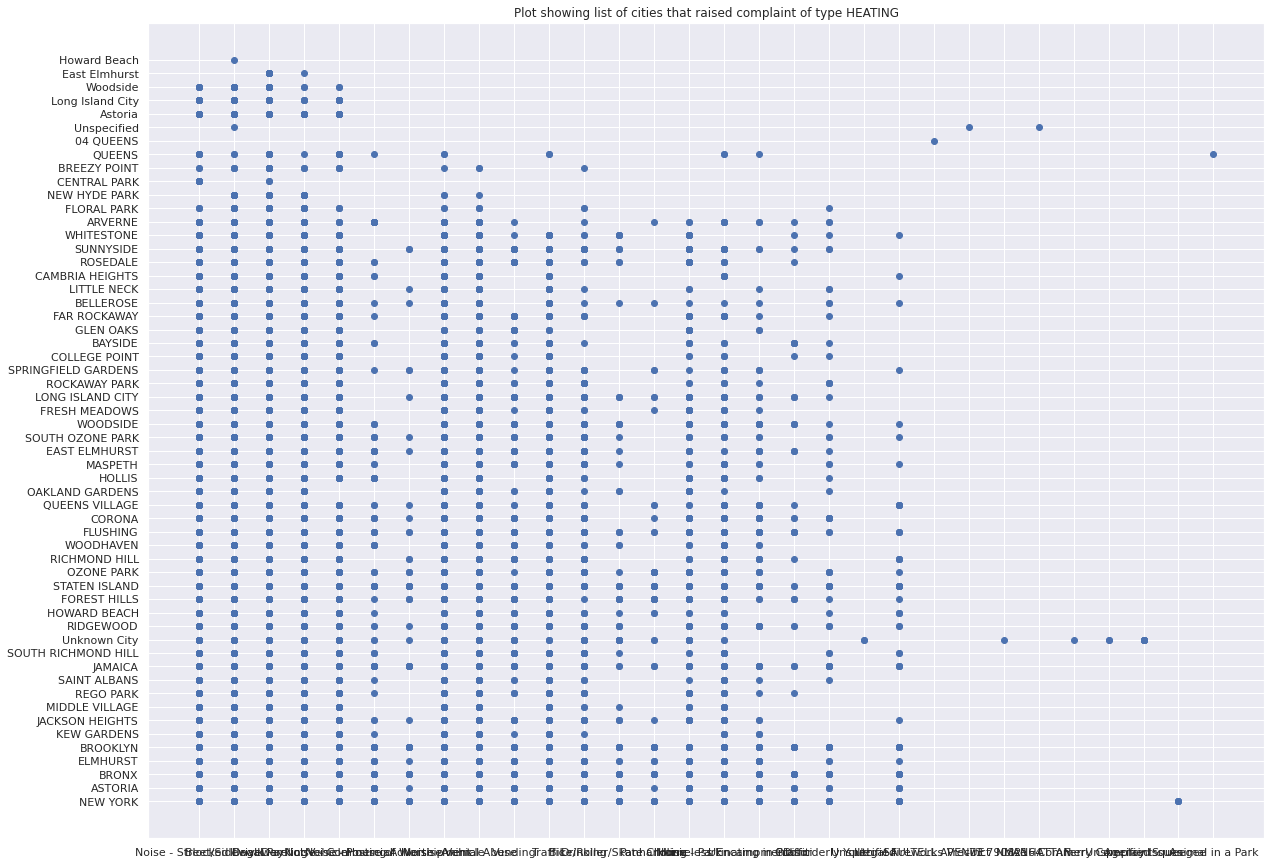

In [ ]:
plt.figure(figsize=(20, 15))
plt.scatter(df['Complaint Type'],df['City'])
plt.title('Plot showing list of cities that raised complaint of type HEATING')
plt.show()

In [ ]:
df.head()

,Unique Key,Created Date,Closed Date,Complaint Type,Descriptor,Incident Zip,Incident Address,St,Cross Street 1,Cross Street 2,City,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,Noise - Street/Sidewalk,Loud Music/Party,10034,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,NEW YORK,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 0:55,12 MANHATTAN,MANHATTAN,1005409,254678.0,MANHATTAN,40.86568154,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,Blocked Driveway,No Access,11105,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,ASTORIA,Closed,01-01-16 7:59,The Police Department responded to the complai...,01-01-16 1:26,01 QUEENS,QUEENS,1007766,221986.0,QUEENS,40.77594531,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,Blocked Driveway,No Access,10458,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,BRONX,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 4:51,07 BRONX,BRONX,1015081,256380.0,BRONX,40.87032452,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,Illegal Parking,Commercial Overnight Parking,10461,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,BRONX,Closed,01-01-16 7:57,The Police Department responded to the complai...,01-01-16 7:43,10 BRONX,BRONX,1031740,243899.0,BRONX,40.83599405,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,Illegal Parking,Blocked Sidewalk,11373,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,ELMHURST,Closed,01-01-16 7:56,The Police Department responded and upon arriv...,01-01-16 3:24,04 QUEENS,QUEENS,1019123,206375.0,QUEENS,40.73305962,-73.87417,"(40.733059618956815, -73.87416975810375)"


In [ ]:
 from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import f1_score

In [ ]:
kf = KFold(n_splits=5,random_state=42,shuffle=True)

mdl = []
fold = []
scr = []

for i,(train_index, test_index) in enumerate(kf.split(df_downsampled)):
    training = df.iloc[train_index,:]
    valid = df.iloc[test_index,:]
    print(i)
    for clf in clf_list:
        model = clf.__class__.__name__
        feats = training[features] 
        label = training['Isfraud']
        valid_feats = valid[features]
        valid_label = valid['Isfraud']
        clf.fit(feats,label) 
        pred = clf.predict(valid_feats)
        score = f1_score(y_true = valid_label, y_pred = pred)
        fold.append(i+1)
        scr.append(score)
        mdl.append(model)
        print(model)
performance = pd.DataFrame({'Model': mdl, 'Score':scr,'Fold':fold})
g_downsampled = ggplot(performance,aes(x='Fold',y='Score',group = 'Model',color = 'Model')) + geom_point() + geom_line()
print(g_downsampled)
        